Predicting the patient has Heart Disease or not

In [22]:
import pandas as pd
import numpy as np

data = pd.read_csv("heart.csv")

data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [24]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Treating Outliers

In [25]:
data = data[data.RestingBP<=(data.RestingBP.mean()+3*data.RestingBP.std())]
data = data[data.Cholesterol<=(data.Cholesterol.mean()+3*data.Cholesterol.std())]
data = data[data.MaxHR<=(data.MaxHR.mean()+3*data.MaxHR.std())]
data = data[data.Oldpeak<=(data.Oldpeak.mean()+3*data.Oldpeak.std())]
data.shape

(902, 12)

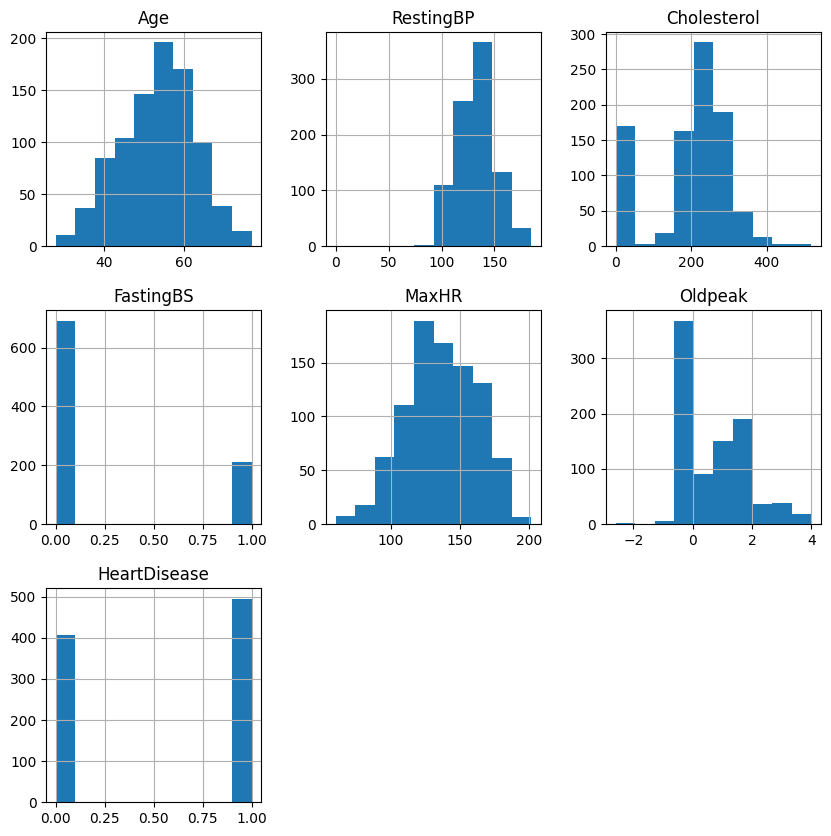

In [26]:
plot =data.hist(figsize=(10,10))

In [27]:
df = pd.get_dummies(data, columns=["Sex","ChestPainType",'RestingECG','ExerciseAngina','ST_Slope'])

df.shape

(902, 21)

In [28]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [29]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X = scalar.fit_transform(X)
X

array([[0.24489796, 0.75675676, 0.55791506, ..., 0.        , 0.        ,
        1.        ],
       [0.42857143, 0.86486486, 0.34749035, ..., 0.        , 1.        ,
        0.        ],
       [0.18367347, 0.7027027 , 0.54633205, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59183673, 0.7027027 , 0.25289575, ..., 0.        , 1.        ,
        0.        ],
       [0.59183673, 0.7027027 , 0.45559846, ..., 0.        , 1.        ,
        0.        ],
       [0.20408163, 0.74594595, 0.33783784, ..., 0.        , 0.        ,
        1.        ]])

In [31]:
# from sklearn.decomposition import PCA

# pca = PCA(0.98) #retain 98% information

# X = pca.fit_transform(X)
# X.shape

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

Model building

In [33]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(max_depth=8)

model_rfc.fit(X_train,y_train)

print("Train score: {:.3f}".format(model_rfc.score(X_train,y_train)))
print("Train score: {:.3f}".format(model_rfc.score(X_test,y_test)))

from sklearn.metrics import classification_report

#Selecting the Random Forest
y_pred = model_rfc.predict(X_test)

print(classification_report(y_test,y_pred))

Train score: 0.967
Train score: 0.841
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       102
           1       0.85      0.86      0.86       124

    accuracy                           0.84       226
   macro avg       0.84      0.84      0.84       226
weighted avg       0.84      0.84      0.84       226



In [34]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(max_iter=1200)

model_log.fit(X_train,y_train)

print("Train score: {:.3f}".format(model_log.score(X_train,y_train)))
print("Train score: {:.3f}".format(model_log.score(X_test,y_test)))

y_pred = model_log.predict(X_test)

print(classification_report(y_test,y_pred))

Train score: 0.871
Train score: 0.841
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       102
           1       0.84      0.87      0.86       124

    accuracy                           0.84       226
   macro avg       0.84      0.84      0.84       226
weighted avg       0.84      0.84      0.84       226



In [35]:
from sklearn.svm import SVC
model_svc = SVC()

model_svc.fit(X_train,y_train)

print("Train score: {:.3f}".format(model_svc.score(X_train,y_train)))
print("Train score: {:.3f}".format(model_svc.score(X_test,y_test)))

y_pred = model_svc.predict(X_test)

print(classification_report(y_test,y_pred))

Train score: 0.888
Train score: 0.858
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       102
           1       0.86      0.89      0.87       124

    accuracy                           0.86       226
   macro avg       0.86      0.86      0.86       226
weighted avg       0.86      0.86      0.86       226



RandomForestClassifier(max_depth=8) Avg CV score: 0.861
LogisticRegression(max_iter=1200) Avg CV score: 0.853
SVC() Avg CV score: 0.846


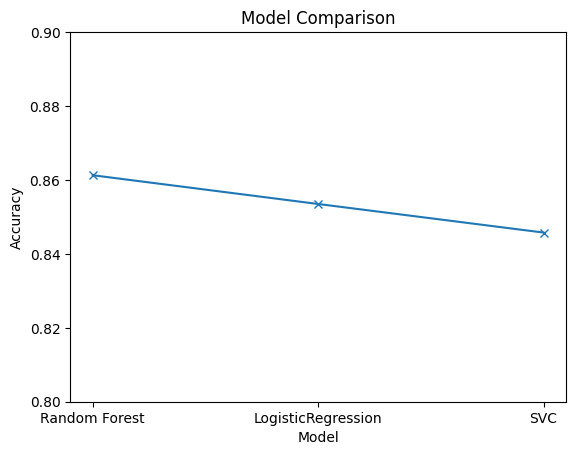

In [36]:
from sklearn.model_selection import cross_val_score,KFold
from matplotlib import pyplot as plt
models = [model_rfc,model_log,model_svc]
means = []
for model in models:
    kfold = KFold(n_splits=8)
    scores = cross_val_score(model, X, y, cv=kfold)
    means.append(scores.mean())
    print(model,"Avg CV score: {:.3f}".format(scores.mean()))
   


labels = ["Random Forest", "LogisticRegression","SVC"]
plt.plot(labels,means, marker='x')
plt.ylim(0.8,0.9)
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()